# Intro to Data Science and Machine Learning
For this workshop we will be using Titanic data from Kaggle. We will be predicting who will survive the Titanic based on other data available to us.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing data
* Download the data from here: https://www.kaggle.com/c/titanic/data
* Place it into a folder 'data' in the same directory as this file



In [2]:
# Read data from csv file
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

## Getting to know your data
It is important to get to know your data. On the kaggle link you can find an overview, data dictionary, and some variable notes that will help you understand what is included. Feel free to also open up the csv's and take a look yourself. 
Here are some things you can do to get to know your data:
* Check for any variables that may not be useful
    * For example, in the Titanic dataset we have the passenger's name. Does an individual's name affects their chances of survival?
* Check for null values
* Check for any weird values
* Look at the possible ranges of different variables
    * We don't want variable A to have values 0-1000 while B has values 0-0.1. This would severaly affect the algorithms we choose to use later on.
* See if we can represent any variables in a more managable way

If the algorithm is doing something wierd or buggy, take a look at your dataset and see if there is something wierd going on there.

Below, take a look at some of the data:

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### Determining which variables to use
We don't want to complicate our learning algorithm with anything that may not be useful.

In [5]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

* PassengerId - Needed for identification, __Keep__
* Survived - The variable we will want to predict, __Keep__
* Pclass - Ticket class, important, by intuition 1st class passengers were probably more likely to survive than 3rd class passengers, __Keep__
* Name - Passenger name probably doesn't help us. It would be too complicated to do linguistical analysis on it, __Drop__
* Sex - Important, women and children boarded first, __Keep__
* Age - Important, women and children boarded first, __Keep__

* SibSp - # of siblings / spouses aboard the Titanic, Maybe?
* Parch - # of parents / children aboard the Titanic, Maybe?
* Ticket - Do we know how if ticket numbers have any meaning. Likely to have no correlation with survival, Maybe?
* Fare - Maybe?
* Cabin - Would rooms that were closer to an escape route have a higher change of survival, __Keep__
* Embarked - We assume that once boarded everyone is equal, __Drop__


_For the parameters that we are unsure if they would be useful, you can either keep them or do some statistical analysis to determine if it would be useful to keep or not. Or if you need to simplify your algorithm, you can just drop them._

__For simplicity, we will choose two columns to work with: age and fare.__
These are two values that are numerical in nature and will allow us to plot datat in 2d.

In [6]:
# Let's store the columns we want to train on as x_col
x_col = ['Age', 'Fare']
# Let's store our y column as well (the one we want to predict)
y_col = ['Survived']

### Checking for nulls
Most learning algorithms will not be able to handle null values. Here are some options for handling null values:
* Deleting entries that have a null
* Replacing the null with some default value
* Replacing the null with the mean or median of that column
* A combination of the above depending on column

Below we will simply delete the entries with null values, however be weary because sometimes this will make your dataset too small.

In [7]:
# How to check if a cell is null, returns a dataframe of
# the same shape of True/False
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
# Delete nulls
train_df.dropna(subset=x_col, inplace=True)
test_df.dropna(subset=x_col, inplace=True)

### Normalization - How to manage different value ranges
This method will make every value between 0 and 1. This is important for your algorithm to consider the variables to have the same importance. Otherwise, one variable that is 10 times larger will skew the results in its favor.

One way to normalize is:
normalized_value = (value - min) / (max - min)

We will do the above on out two chosen parameters Age and Fare.

In [9]:
train_df['Age'] = (train_df['Age'] - train_df['Age'].min()) \
        / (train_df['Age'].max() - train_df['Age'].min())
train_df['Fare'] = (train_df['Fare'] - train_df['Fare'].min()) \
        / (train_df['Fare'].max() - train_df['Fare'].min())
    
# Do the same to test dataframe
test_df['Age'] = (test_df['Age'] - test_df['Age'].min()) \
        / (test_df['Age'].max() - test_df['Age'].min())
test_df['Fare'] = (test_df['Fare'] - test_df['Fare'].min()) \
        / (test_df['Fare'].max() - test_df['Fare'].min())

## Split data into training dataset and testing dataset
* Training dataset - Typically about 80% of your data, used to 'train' your machine learning algorithm.
* Test dataset - Typically about 20% of your data, the learning algorithm should not see this data while training or you risk overfitting. Used after to test an already trained model on unseen data to determine how well it works.
    * It looks like Kaggle supplied this, but don't be fooled - you don't know the true value of the test data they supplied, so you cannot actually check your work
* Overfitting - When the trained model can predict every point in the training dataset perfectly (error rate ~0%), but cannot generalize to a new example it has not seen before (error rate very high). Algorithm is generally over complicated.

_Note df stands for dataframe, as we are storing the values in a pandas dataframe. This is similar to a table._

Imagine train.csv is the data you currently have to train your model, and test.csv is data you will see in the future (and you don't know the results of).

In [10]:
# Create a mask length of dataframe
# 80% of it will go to training set rest to testing set
msk = np.random.rand(len(train_df)) < 0.8

# split train_df into a training set  and testing set
trainingset_df = train_df[msk]
testingset_df = train_df[~msk]

## Choosing a Machine Learning Algorithm
scikit-learn is a great open source library full of interesting machine learning algorithms. Checkout their website to learn more:  http://scikit-learn.org/

Machine learning can be split into two general categories:
1. __Supervised Learning__ - we know what we are looking for and have _labeled_ data
2. __Unsupervised Learning__ - we don't know what we are looking for or are looking for general patterns, we do _not_ have labled data

We can split Supervised Learning further into
1. __Regression__ - predict a continous value
2. __Classification__ - predict a discrete value

In the Titanic dataset, we want to predict whether or not a passenger survives. We have labled data points which can have two discrete values. We should choose a supervised learning algorithm to do classification.

In particular let's choose __gradient descent__ as an example below.
For more details see here: http://scikit-learn.org/stable/modules/sgd.html#classification

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Choose specific algorithm
clf = SGDClassifier(alpha=0.0001, max_iter=500)

### Training a model

In [12]:
clf.fit(trainingset_df[x_col], trainingset_df[y_col].values.ravel())

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=500, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

### Testing the model
Once you fit the data to a model, you can __predict__ y values for data that you may or may not have y data for. When testing the model you will want to predict y values and then compare them to the actual y values.

You can also get a __decision function__ from the specific algorithm we chose. This is a line which the algorithm chose to split the data among.

In [13]:
predicted_y = clf.predict(testingset_df[x_col])
predicted_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [14]:
# True values for comparison
testingset_df[y_col].values.ravel()

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0], dtype=int64)

#### Accuracy

In [15]:
accuracy_score(testingset_df[y_col].values.ravel(), predicted_y)

0.6223776223776224

#### Plotting Results

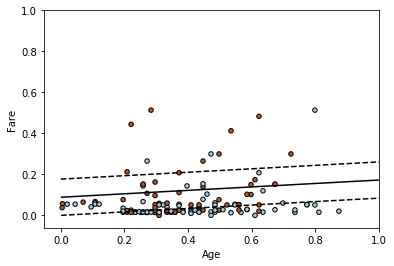

In [16]:
# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(0, 1, 10)
yy = np.linspace(0, 1, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)

# Adding our data
plt.scatter(testingset_df[x_col[0]], testingset_df[x_col[1]], 
            c=testingset_df[y_col].values.ravel(), cmap=plt.cm.Paired, 
            edgecolor='black', s=20)                        
                          
plt.axis('tight')
plt.xlabel(x_col[0])
plt.ylabel(x_col[1])
plt.show()